In [70]:
## Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from mlxtend.plotting import plot_confusion_matrix

from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [71]:
## Load the dataset
data = pd.read_csv('news_articles.csv')

In [72]:
# Display Head of the Dataframe
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [73]:
# Display Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


- There are 2096 entries  
- We have 12 features, 11 of them are categorical and 1 is numerical column.  
- There is NULL values.  

In [74]:
# Display Data Description
data.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [75]:
# Display Label Description
data.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1294.0  0.736476  0.440714  0.0  0.0  1.0  1.0  1.0
Real     801.0  0.842697  0.364314  0.0  1.0  1.0  1.0  1.0

In [76]:
## Explore Unique Values
column_names = list(data.columns)
for col_name in column_names:
    print(col_name, ':', data[col_name].nunique())

author : 491
published : 2006
title : 1784
text : 1941
language : 5
site_url : 68
main_img_url : 1229
type : 8
label : 2
title_without_stopwords : 1780
text_without_stopwords : 1937
hasImage : 2


In [77]:
## Display Unique Values
print("Languages:", data["language"].unique())
print("Type:", data["type"].unique())
print("Label:", data["label"].unique())
print("HasImage:", data["hasImage"].unique())

Languages: ['english' 'ignore' 'german' 'french' 'spanish' nan]
Type: ['bias' 'conspiracy' 'fake' 'bs' 'satire' 'hate' 'junksci' 'state' nan]
Label: ['Real' 'Fake' nan]
HasImage: [ 1.  0. nan]


Type:  
- bs (i.e. bullshit)  
- junksci(i.e. junk science)  

In [78]:
# Remove Duplicate Rows
print("Before Removing Duplicates:", data.shape[0]) 
data.drop_duplicates()
print("After Removing Duplicates:", data.shape[0]) 

Before Removing Duplicates: 2096


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2091,-NO AUTHOR-,2016-10-27T15:36:10.573+03:00,teens walk free after gangrape conviction,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/hillary_haunt...,bias,Real,good samaritan wearing indian headdress disarm...,NaN,1.0
2092,-NO AUTHOR-,2016-10-27T15:36:10.671+03:00,school named for munichmassacre mastermind,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/rambo_richard...,bias,Real,skype sex scam fortune built shame,NaN,1.0
2093,-NO AUTHOR-,2016-10-27T13:30:00.000+03:00,russia unveils satan missile,NaN,english,wnd.com,http://www.wnd.com/files/2016/10/skype_sex_sca...,bs,Fake,cannabis aficionados develop thca crystalline ...,NaN,1.0
2094,-NO AUTHOR-,2016-10-27T15:58:41.935+03:00,check out hillarythemed haunted house,NaN,english,wnd.com,http://worldtruth.tv/wp-content/uploads/2016/1...,bs,Fake,title,NaN,0.0


After Removing Duplicates: 2096


There is no duplicates in the data.

In [79]:
# Check Null Values
null_data = pd.concat([pd.DataFrame(data.isnull().sum()), pd.DataFrame((100*data.isnull().sum()/len(data)).round(2))], axis=1)
null_data.columns = ["NaN Data", "NaN (%)"]
null_data.sort_values(ascending=False, by="NaN Data")

,NaN Data,NaN (%)
text_without_stopwords,50,2.39
text,46,2.19
title_without_stopwords,2,0.10
language,1,0.05
site_url,1,0.05
main_img_url,1,0.05
type,1,0.05
label,1,0.05
hasImage,1,0.05
author,0,0.00


There are close to 2.5% values which are missing in the columns 'text_without_stopwords' and 'text' and close to 0.5% missing values in other some columns. We will be dropping these null values.

In [80]:
# Copy Original Data
data_orig = data.copy()

# Drop Null Values
data = data.dropna()

# Display Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 2045
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2045 non-null   object 
 1   published                2045 non-null   object 
 2   title                    2045 non-null   object 
 3   text                     2045 non-null   object 
 4   language                 2045 non-null   object 
 5   site_url                 2045 non-null   object 
 6   main_img_url             2045 non-null   object 
 7   type                     2045 non-null   object 
 8   label                    2045 non-null   object 
 9   title_without_stopwords  2045 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2045 non-null   float64
dtypes: float64(1), object(11)
memory usage: 207.7+ KB


In [81]:
# Count Language Types and Put into a Dataframe
language = data.groupby(['language'])['language'].count().to_frame('count').reset_index().sort_values(ascending=False, by="count")
language

,language,count
0,english,1967
2,german,72
3,ignore,3
1,french,2
4,spanish,1


Text(0.5, 1.0, 'Language Distribution')

Text(0, 0.5, 'Language')

Text(0.5, 0, 'Quantity')

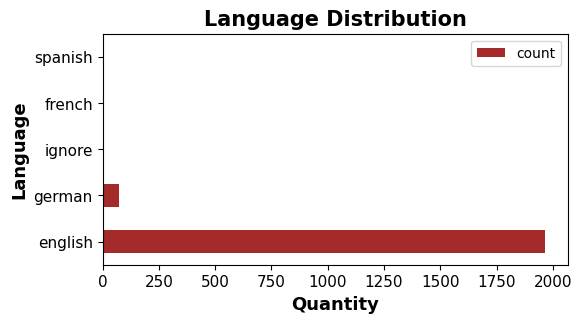

In [82]:
# Plot the Language Distribution
ax = language.plot.barh(figsize = (6,3), y='count', x = 'language', color = 'brown')

# Set titles
ax.set_title("Language Distribution", fontsize=15, fontweight='bold')
ax.set_ylabel("Language", fontsize=13, fontweight='bold')
ax.set_xlabel("Quantity", fontsize=13, fontweight='bold')
ax.tick_params(axis="both", labelsize=11) 

In [83]:
# Count Types and Put into a Dataframe
type = data.groupby(['type'])['type'].count().to_frame('count').reset_index().sort_values(ascending=False, by="count")
type.reset_index(drop=True)

,type,count
0,bs,598
1,conspiracy,430
2,bias,389
3,hate,244
4,satire,146
5,state,121
6,junksci,102
7,fake,15


Text(0.5, 1.0, 'Count of News Articles by Type')

Text(0, 0.5, 'Type')

Text(0.5, 0, 'Quantity')

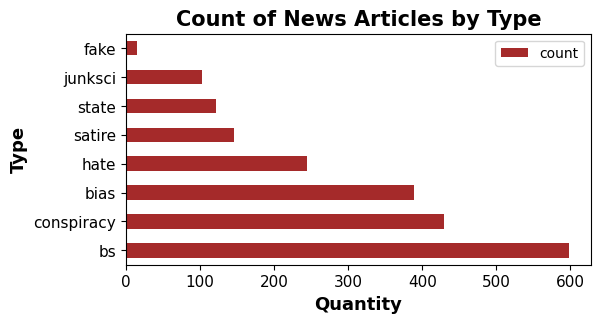

In [84]:
# Plot the Type Distribution
ax = type.plot.barh(figsize = (6,3), y='count', x = 'type', color = 'brown')

# Set titles
ax.set_title("Count of News Articles by Type", fontsize=15, fontweight='bold')
ax.set_ylabel("Type", fontsize=13, fontweight='bold')
ax.set_xlabel("Quantity", fontsize=13, fontweight='bold')
ax.tick_params(axis="both", labelsize=11) 

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Types of articles')

(-1.25, 1.25, -1.25, 1.25)

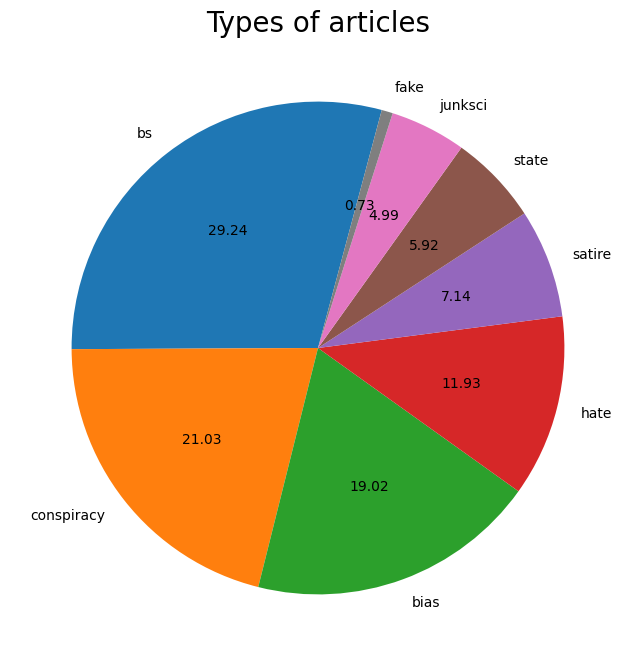

In [85]:
data['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75, autopct="%.2f")
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

,label,count
0,Fake,1291
1,Real,754


<Axes: ylabel='count'>

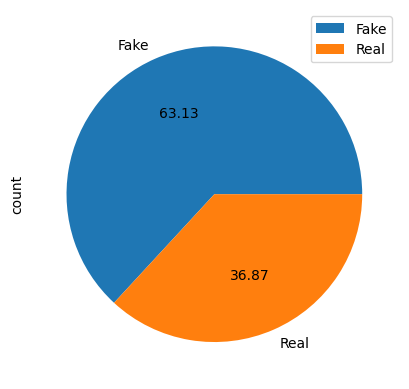

In [86]:
# Count Label Types and Put into a Dataframe
label = data.groupby(['label'])['label'].count().to_frame('count').reset_index()
display(label)

# Plotting pie chart
fig, ax = plt.subplots()
label.plot(kind = 'pie', y = 'count', labels = label['label'], autopct = '%1.2f', ax = ax)

---

In [87]:
# Show some stop words
stopwords.words('english')[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [88]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Perform lemmatization
    4. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    lemma = nlp.WordNetLemmatizer()
    nopunc = [ lemma.lemmatize(word) for word in nopunc]

In [89]:
data['title'].apply(text_process)

0       [muslims, busted, stole, millions, govt, benef...
1       [attorney, general, loretta, lynch, plead, fifth]
2       [breaking, weiner, cooperating, fbi, hillary, ...
3       [pin, drop, speech, father, daughter, kidnappe...
4       [fantastic, trumps, point, plan, reform, healt...
                              ...                        
2041                  [never, trumpers, must, reconsider]
2042        [election, crossroads, socialism, capitalism]
2043                          [reasons, ill, vote, trump]
2044      [new, country, women, minorities, hit, hardest]
2045             [trump, vs, clinton, risk, vs, disaster]
Name: title, Length: 2045, dtype: object

In [90]:
data['text'].head(5).apply(text_process)

0    [print, pay, back, money, plus, interest, enti...
1    [attorney, general, loretta, lynch, plead, fif...
2    [red, state, fox, news, sunday, reported, morn...
3    [email, kayla, mueller, prisoner, tortured, is...
4    [email, healthcare, reform, make, america, gre...
Name: text, dtype: object

In [91]:
# CountVectorizer (convert text to numeric data)

bow_transformer = CountVectorizer(analyzer=text_process).fit(data['text'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

47110


In [92]:
messages_bow = bow_transformer.transform(data['text'])

In [93]:
# TfidTransformer (It is a way to represent text as meaningful numbers, also known as vector representation.)
tfidf_transformer = TfidfTransformer().fit(messages_bow)

messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2045, 47110)


In [94]:
# Label Encoder
le = LabelEncoder()

# Fit the Data into Label Encoder
y = le.fit_transform(data.label)

In [95]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(data['text'], y, test_size=0.2, random_state = 42)

print(len(X_train), len(X_test), len(X_train) + len(X_test))

1636 409 2045


---

## Random Forest

In [96]:
classifier = RandomForestClassifier(n_estimators=50, criterion='entropy',random_state=0)
classifier.fit(messages_tfidf, data['label'])

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

In [97]:
pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ SVM
])

# Train the Model
pipeline_rf.fit(X_train, y_train)

# Make Prediction
y_pred_rf = pipeline_rf.predict(X_test)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12c4cc4c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [98]:
## Model Evaluation of RandomForest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

0.7799511002444988

In [99]:
## Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
conf_mat_rf

array([[249,  15],
       [ 75,  70]])

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confision Matrix')

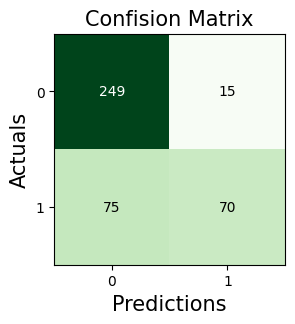

In [100]:
# Plot Confusion Matrix 
# from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_rf, figsize=(3,3), cmap="Greens")
plt.xlabel("Predictions", fontsize =15)
plt.ylabel("Actuals", fontsize =15)
plt.title("Confision Matrix", fontsize =15)
plt.show()

In [101]:
# Classification Report
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85       324
           1       0.48      0.82      0.61        85

    accuracy                           0.78       409
   macro avg       0.71      0.80      0.73       409
weighted avg       0.85      0.78      0.80       409



AUC: 0.712970


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

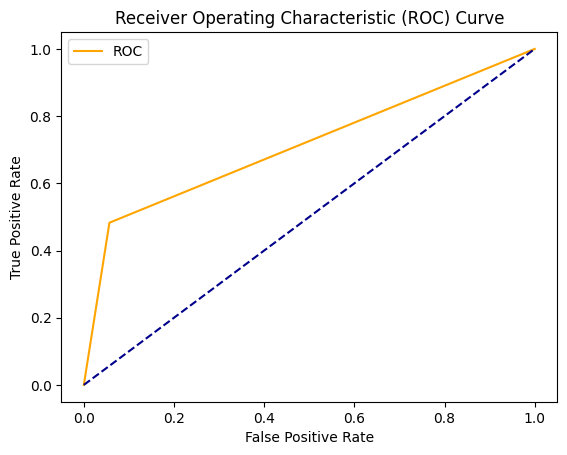

In [102]:
auc = roc_auc_score(y_test, y_pred_rf)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test, y_pred_rf)[0:2] 
# [0:2] kullanmak istemiyorsan tpr'den sonra altçizgi kullanılabilir. fpr, tpr, _ = roc_curve()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

---

## Decision Trees

In [103]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)

In [104]:
pipeline_dt = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ SVM
])

# Train the Model
pipeline_dt.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x12c4cc4c0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [105]:
# Make Prediction
y_pred_dt = pipeline_dt.predict(X_test)

In [106]:
## Model Evaluation of RandomForest
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_dt

0.7310513447432763

In [107]:
## Confusion Matrix
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
conf_mat_dt

array([[205,  59],
       [ 51,  94]])

Text(0.5, 0, 'Predictions')

Text(0, 0.5, 'Actuals')

Text(0.5, 1.0, 'Confision Matrix')

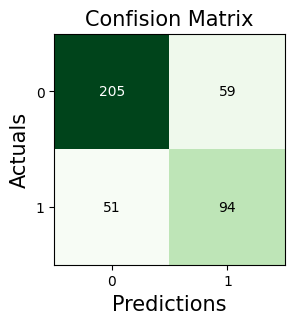

In [108]:
# Plot Confusion Matrix 
# from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_mat_dt, figsize=(3,3), cmap="Greens")
plt.xlabel("Predictions", fontsize =15)
plt.ylabel("Actuals", fontsize =15)
plt.title("Confision Matrix", fontsize =15)
plt.show()

In [109]:
# Classification Report
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       256
           1       0.65      0.61      0.63       153

    accuracy                           0.73       409
   macro avg       0.71      0.71      0.71       409
weighted avg       0.73      0.73      0.73       409



AUC: 0.712396


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

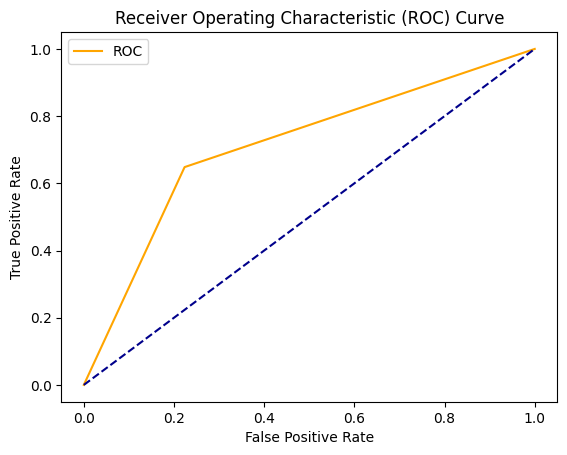

In [110]:
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %f' %auc)

fpr, tpr = roc_curve(y_test, y_pred_dt)[0:2] 
# [0:2] kullanmak istemiyorsan tpr'den sonra altçizgi kullanılabilir. fpr, tpr, _ = roc_curve()
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()